<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/Niloy_Research_Code_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/sh/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda?dl=0



--2021-05-11 05:18:47--  https://www.dropbox.com/sh/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda [following]
--2021-05-11 05:18:48--  https://www.dropbox.com/sh/raw/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccc68b3a4cdfb46dd6aa4aef8c4.dl.dropboxusercontent.com/zip_download_get/Axr2N1k7cUkdJJDbL_DZHwth-zkZJ5arHDrmGaevyuV6fFGf_cdDSXfPn_jqVWyH-ymO7X0yOUOLfLDQ8lH_srBdpF6bityLOFO6z9fxRSRgBQ [following]
--2021-05-11 05:18:53--  https://uccc68b3a4cdfb46dd6aa4aef8c4.dl.dropboxusercontent.com/zip_download_get/Axr2N1k7cUkdJJDbL_DZHwth-zkZJ5arHDrmGaevyuV6fFGf_cdDSXfPn_jqVWyH-ymO7X0yOUOLfLDQ8

In [ ]:
!unzip AADEmpop2CjJymIZ3QXkELpda?dl=0


Streaming output truncated to the last 5000 lines.
 extracting: Test/Normal/NORMAL_test_615.jpg  
 extracting: Train/Covid/COVID_train_422.jpg  
 extracting: Test/Normal/NORMAL_test_300.jpg  
 extracting: Test/Normal/NORMAL_test_686.jpg  
 extracting: Train/Covid/COVID_train_284.jpg  
 extracting: Test/Normal/NORMAL_test_165.jpg  
 extracting: Test/Normal/NORMAL_test_519.jpg  
 extracting: Train/Normal/NORMAL_train_5.jpg  
 extracting: Train/Covid/COVID_train_925.jpg  
 extracting: Test/Normal/NORMAL_test_295.jpg  
 extracting: Train/Covid/COVID_train_676.jpg  
 extracting: Test/Normal/NORMAL_test_702.jpg  
 extracting: Train/Covid/COVID_train_540.jpg  
 extracting: Test/Normal/NORMAL_test_781.jpg  
 extracting: Train/Covid/COVID_train_415.jpg  
 extracting: Train/Covid/COVID_train_843.jpg  
 extracting: Train/Covid/COVID_train_583.jpg  
 extracting: Train/Covid/COVID_train_439.jpg  
 extracting: Test/Normal/NORMAL_test_420.jpg  
 extracting: Test/Normal/NORMAL_test_318.jpg  
 extracti

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import tensorflow_hub as hub
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import tensorboard

X_train_path = "/content/Train"
X_test_path = "/content/Test"
Val_test_path = "/content/Val"

# design the traing dataset
train_datagen = image.ImageDataGenerator(
    rescale=1/255,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=True
)

X_train = train_datagen.flow_from_directory(
    X_train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode = "binary"
)

# design the test dataset
test_datagen = image.ImageDataGenerator(rescale=1/255)

X_test = test_datagen.flow_from_directory(
    X_test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# design the test dataset
Val_datagen = image.ImageDataGenerator(rescale=1/255)

Val_test = test_datagen.flow_from_directory(
    Val_test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# print(X_train.samples)
# y_train = X_train.classes
# y_test = X_test.classes


Found 5581 images belonging to 2 classes.
Found 1860 images belonging to 2 classes.
Found 1862 images belonging to 2 classes.


***ResNet152V***

Epoch 1/5
175/175 [==============================] - 96s 506ms/step - loss: 1.4613 - accuracy: 0.7202 - val_loss: 0.4863 - val_accuracy: 0.8566
Epoch 2/5
175/175 [==============================] - 86s 490ms/step - loss: 0.4963 - accuracy: 0.8613 - val_loss: 0.4666 - val_accuracy: 0.8641
Epoch 3/5
175/175 [==============================] - 86s 491ms/step - loss: 0.3931 - accuracy: 0.8848 - val_loss: 0.4271 - val_accuracy: 0.8899
Epoch 4/5
175/175 [==============================] - 86s 491ms/step - loss: 0.3929 - accuracy: 0.8857 - val_loss: 0.5413 - val_accuracy: 0.8485
Epoch 5/5
59/59 [==============================] - 15s 245ms/step - loss: 0.5988 - accuracy: 0.8237


Text(0.5, 1.0, 'Accuracy Evolution')

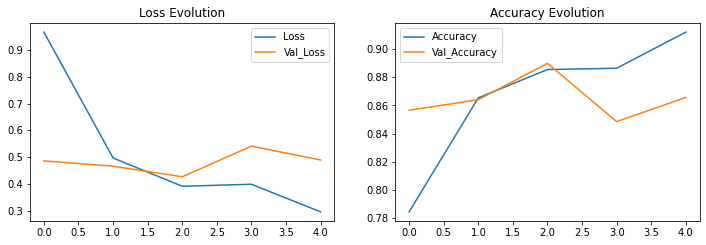

In [27]:
# TL Model
base_model = keras.applications.ResNet152V2(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**ResNet152V2**

Epoch 1/10
175/175 [==============================] - 96s 505ms/step - loss: 1.6912 - accuracy: 0.7144 - val_loss: 0.5411 - val_accuracy: 0.8421
Epoch 2/10
175/175 [==============================] - 86s 493ms/step - loss: 0.5672 - accuracy: 0.8466 - val_loss: 0.3819 - val_accuracy: 0.8770
Epoch 3/10
175/175 [==============================] - 86s 491ms/step - loss: 0.4158 - accuracy: 0.8795 - val_loss: 0.5659 - val_accuracy: 0.8362
Epoch 4/10
175/175 [==============================] - 85s 488ms/step - loss: 0.3756 - accuracy: 0.8873 - val_loss: 0.3324 - val_accuracy: 0.8974
Epoch 5/10
175/175 [==============================] - 85s 484ms/step - loss: 0.2905 - accuracy: 0.9107 - val_loss: 0.2933 - val_accuracy: 0.9130
Epoch 6/10
175/175 [==============================] - 85s 484ms/step - loss: 0.2417 - accuracy: 0.9213 - val_loss: 0.2959 - val_accuracy: 0.9103
Epoch 7/10
175/175 [==============================] - 85s 486ms/step - loss: 0.2307 - accuracy: 0.9187 - val_loss: 0.2942 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

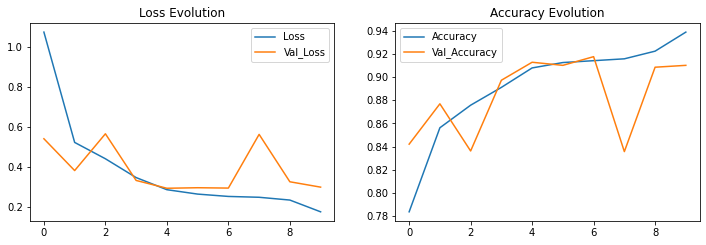

In [28]:
# TL Model
base_model = keras.applications.ResNet152V2(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**ResNet50V2**

Epoch 1/5
175/175 [==============================] - 71s 393ms/step - loss: 1.4379 - accuracy: 0.7317 - val_loss: 0.6227 - val_accuracy: 0.8314
Epoch 2/5
175/175 [==============================] - 68s 388ms/step - loss: 0.4691 - accuracy: 0.8691 - val_loss: 0.4527 - val_accuracy: 0.8802
Epoch 3/5
175/175 [==============================] - 68s 387ms/step - loss: 0.3827 - accuracy: 0.8928 - val_loss: 0.3902 - val_accuracy: 0.8883
Epoch 4/5
175/175 [==============================] - 67s 386ms/step - loss: 0.3321 - accuracy: 0.9027 - val_loss: 0.4007 - val_accuracy: 0.8953
Epoch 5/5
59/59 [==============================] - 6s 102ms/step - loss: 0.8709 - accuracy: 0.7995


Text(0.5, 1.0, 'Accuracy Evolution')

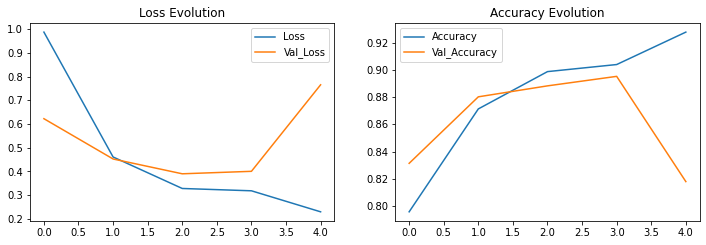

In [29]:
# TL Model
base_model = keras.applications.ResNet50V2(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


Epoch 1/10
175/175 [==============================] - 73s 397ms/step - loss: 1.4015 - accuracy: 0.7184 - val_loss: 0.5672 - val_accuracy: 0.8523
Epoch 2/10
175/175 [==============================] - 68s 389ms/step - loss: 0.4239 - accuracy: 0.8751 - val_loss: 0.4842 - val_accuracy: 0.8700
Epoch 3/10
175/175 [==============================] - 68s 392ms/step - loss: 0.3629 - accuracy: 0.8965 - val_loss: 0.4267 - val_accuracy: 0.8802
Epoch 4/10
175/175 [==============================] - 68s 390ms/step - loss: 0.2727 - accuracy: 0.9106 - val_loss: 0.6513 - val_accuracy: 0.8308
Epoch 5/10
175/175 [==============================] - 68s 390ms/step - loss: 0.3534 - accuracy: 0.8984 - val_loss: 0.3814 - val_accuracy: 0.9125
Epoch 6/10
175/175 [==============================] - 68s 388ms/step - loss: 0.1875 - accuracy: 0.9357 - val_loss: 0.4725 - val_accuracy: 0.8845
Epoch 7/10
175/175 [==============================] - 68s 387ms/step - loss: 0.2374 - accuracy: 0.9305 - val_loss: 0.3700 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

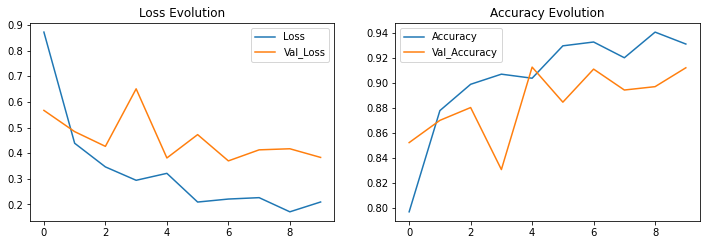

In [30]:
# TL Model
base_model = keras.applications.ResNet50V2(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**VGG16**

Epoch 1/5
175/175 [==============================] - 72s 408ms/step - loss: 0.6402 - accuracy: 0.6085 - val_loss: 0.4543 - val_accuracy: 0.8040
Epoch 2/5
175/175 [==============================] - 71s 406ms/step - loss: 0.4030 - accuracy: 0.8347 - val_loss: 0.3810 - val_accuracy: 0.8421
Epoch 3/5
175/175 [==============================] - 71s 408ms/step - loss: 0.3581 - accuracy: 0.8461 - val_loss: 0.3430 - val_accuracy: 0.8647
Epoch 4/5
175/175 [==============================] - 71s 406ms/step - loss: 0.3334 - accuracy: 0.8646 - val_loss: 0.3198 - val_accuracy: 0.8727
Epoch 5/5
59/59 [==============================] - 8s 126ms/step - loss: 0.3380 - accuracy: 0.8554


Text(0.5, 1.0, 'Accuracy Evolution')

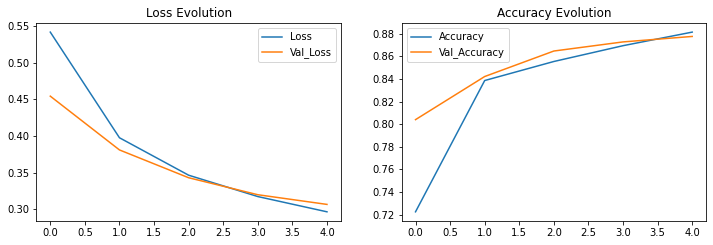

In [31]:
# TL Model
base_model = keras.applications.VGG16(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


Epoch 1/10
175/175 [==============================] - 74s 420ms/step - loss: 0.6553 - accuracy: 0.6479 - val_loss: 0.4838 - val_accuracy: 0.7680
Epoch 2/10
175/175 [==============================] - 72s 412ms/step - loss: 0.4117 - accuracy: 0.8370 - val_loss: 0.4143 - val_accuracy: 0.8099
Epoch 3/10
175/175 [==============================] - 72s 410ms/step - loss: 0.3620 - accuracy: 0.8536 - val_loss: 0.3618 - val_accuracy: 0.8480
Epoch 4/10
175/175 [==============================] - 71s 409ms/step - loss: 0.3261 - accuracy: 0.8702 - val_loss: 0.3431 - val_accuracy: 0.8550
Epoch 5/10
175/175 [==============================] - 71s 408ms/step - loss: 0.3019 - accuracy: 0.8838 - val_loss: 0.3267 - val_accuracy: 0.8620
Epoch 6/10
175/175 [==============================] - 71s 409ms/step - loss: 0.2921 - accuracy: 0.8892 - val_loss: 0.3077 - val_accuracy: 0.8743
Epoch 7/10
175/175 [==============================] - 72s 410ms/step - loss: 0.2766 - accuracy: 0.8985 - val_loss: 0.3006 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

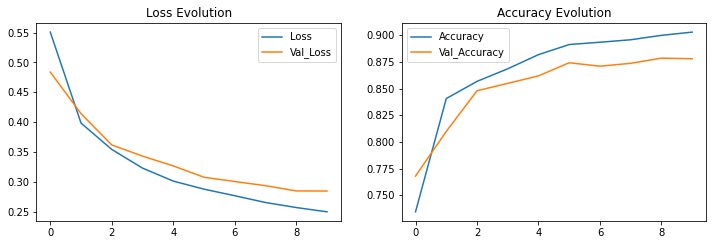

In [32]:
# TL Model
base_model = keras.applications.VGG16(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**DenseNet201**

Epoch 1/5
175/175 [==============================] - 86s 439ms/step - loss: 0.6269 - accuracy: 0.7357 - val_loss: 0.3084 - val_accuracy: 0.8716
Epoch 2/5
175/175 [==============================] - 74s 423ms/step - loss: 0.2923 - accuracy: 0.8854 - val_loss: 0.2432 - val_accuracy: 0.9033
Epoch 3/5
175/175 [==============================] - 74s 420ms/step - loss: 0.2355 - accuracy: 0.9012 - val_loss: 0.2110 - val_accuracy: 0.9232
Epoch 4/5
175/175 [==============================] - 74s 423ms/step - loss: 0.2090 - accuracy: 0.9158 - val_loss: 0.2538 - val_accuracy: 0.8990
Epoch 5/5
59/59 [==============================] - 8s 140ms/step - loss: 0.2741 - accuracy: 0.8892


Text(0.5, 1.0, 'Accuracy Evolution')

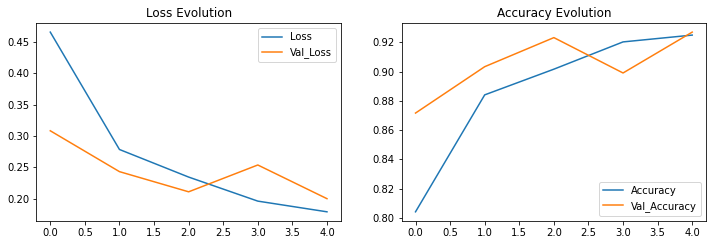

In [33]:
# TL Model
base_model = keras.applications.DenseNet201(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


Epoch 1/10
175/175 [==============================] - 84s 433ms/step - loss: 0.7165 - accuracy: 0.7200 - val_loss: 0.3149 - val_accuracy: 0.8598
Epoch 2/10
175/175 [==============================] - 73s 417ms/step - loss: 0.2940 - accuracy: 0.8753 - val_loss: 0.2429 - val_accuracy: 0.8980
Epoch 3/10
175/175 [==============================] - 73s 417ms/step - loss: 0.2282 - accuracy: 0.9052 - val_loss: 0.2305 - val_accuracy: 0.9049
Epoch 4/10
175/175 [==============================] - 73s 417ms/step - loss: 0.1957 - accuracy: 0.9184 - val_loss: 0.2106 - val_accuracy: 0.9151
Epoch 5/10
175/175 [==============================] - 73s 418ms/step - loss: 0.1816 - accuracy: 0.9255 - val_loss: 0.3497 - val_accuracy: 0.8518
Epoch 6/10
175/175 [==============================] - 73s 417ms/step - loss: 0.1922 - accuracy: 0.9217 - val_loss: 0.2196 - val_accuracy: 0.9114
Epoch 7/10
175/175 [==============================] - 73s 416ms/step - loss: 0.1600 - accuracy: 0.9374 - val_loss: 0.2359 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

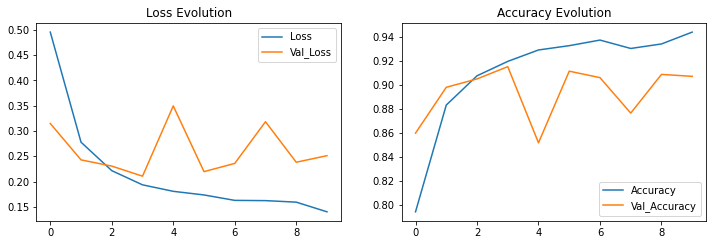

In [34]:
# TL Model
base_model = keras.applications.DenseNet201(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**InceptionResNetV2**

Epoch 1/5
175/175 [==============================] - 89s 465ms/step - loss: 1.1298 - accuracy: 0.6393 - val_loss: 0.4959 - val_accuracy: 0.7820
Epoch 2/5
175/175 [==============================] - 77s 439ms/step - loss: 0.4469 - accuracy: 0.8117 - val_loss: 0.3964 - val_accuracy: 0.8281
Epoch 3/5
175/175 [==============================] - 77s 440ms/step - loss: 0.3968 - accuracy: 0.8316 - val_loss: 0.4050 - val_accuracy: 0.8378
Epoch 4/5
175/175 [==============================] - 77s 441ms/step - loss: 0.3362 - accuracy: 0.8581 - val_loss: 0.3907 - val_accuracy: 0.8362
Epoch 5/5
59/59 [==============================] - 11s 181ms/step - loss: 0.6971 - accuracy: 0.7355


Text(0.5, 1.0, 'Accuracy Evolution')

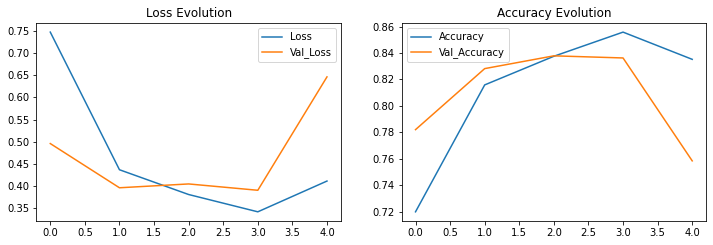

In [35]:
# TL Model
base_model = keras.applications.InceptionResNetV2(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


Epoch 1/10
175/175 [==============================] - 90s 467ms/step - loss: 0.8997 - accuracy: 0.6741 - val_loss: 0.4104 - val_accuracy: 0.8142
Epoch 2/10
175/175 [==============================] - 77s 442ms/step - loss: 0.3921 - accuracy: 0.8276 - val_loss: 0.3678 - val_accuracy: 0.8400
Epoch 3/10
175/175 [==============================] - 77s 441ms/step - loss: 0.3557 - accuracy: 0.8475 - val_loss: 0.4366 - val_accuracy: 0.8174
Epoch 4/10
175/175 [==============================] - 77s 443ms/step - loss: 0.3752 - accuracy: 0.8470 - val_loss: 0.3676 - val_accuracy: 0.8453
Epoch 5/10
175/175 [==============================] - 77s 439ms/step - loss: 0.3198 - accuracy: 0.8631 - val_loss: 0.4200 - val_accuracy: 0.8383
Epoch 6/10
175/175 [==============================] - 78s 445ms/step - loss: 0.3143 - accuracy: 0.8685 - val_loss: 0.4457 - val_accuracy: 0.8212
Epoch 7/10
175/175 [==============================] - 78s 448ms/step - loss: 0.2868 - accuracy: 0.8847 - val_loss: 0.3772 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

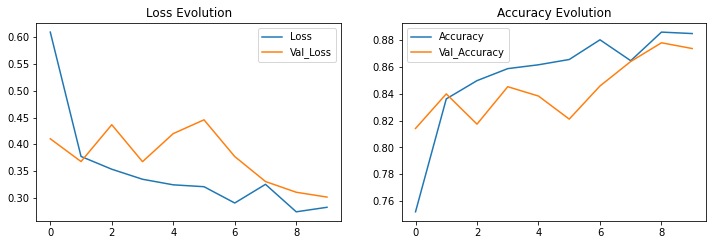

In [36]:
# TL Model
base_model = keras.applications.InceptionResNetV2(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**InceptionV3**

Epoch 1/5
175/175 [==============================] - 73s 398ms/step - loss: 0.9902 - accuracy: 0.6454 - val_loss: 0.4427 - val_accuracy: 0.7997
Epoch 2/5
175/175 [==============================] - 68s 389ms/step - loss: 0.4141 - accuracy: 0.8149 - val_loss: 0.5165 - val_accuracy: 0.7599
Epoch 3/5
175/175 [==============================] - 68s 388ms/step - loss: 0.3439 - accuracy: 0.8506 - val_loss: 0.4468 - val_accuracy: 0.7916
Epoch 4/5
175/175 [==============================] - 67s 386ms/step - loss: 0.3449 - accuracy: 0.8567 - val_loss: 0.3503 - val_accuracy: 0.8491
Epoch 5/5
59/59 [==============================] - 6s 99ms/step - loss: 0.5442 - accuracy: 0.7849


Text(0.5, 1.0, 'Accuracy Evolution')

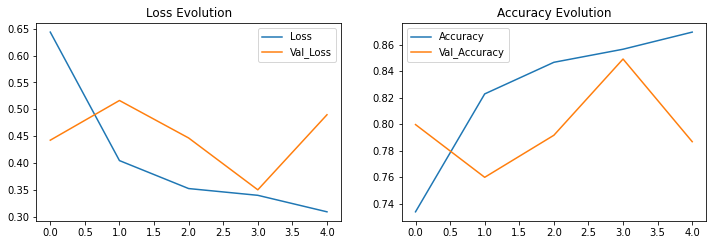

In [37]:
# TL Model
base_model = keras.applications.InceptionV3(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


Epoch 1/10
175/175 [==============================] - 73s 399ms/step - loss: 0.9054 - accuracy: 0.6894 - val_loss: 0.6025 - val_accuracy: 0.7374
Epoch 2/10
175/175 [==============================] - 67s 386ms/step - loss: 0.4283 - accuracy: 0.8137 - val_loss: 0.4030 - val_accuracy: 0.8298
Epoch 3/10
175/175 [==============================] - 67s 385ms/step - loss: 0.3737 - accuracy: 0.8419 - val_loss: 0.4711 - val_accuracy: 0.7954
Epoch 4/10
175/175 [==============================] - 67s 384ms/step - loss: 0.3543 - accuracy: 0.8470 - val_loss: 0.4261 - val_accuracy: 0.8255
Epoch 5/10
175/175 [==============================] - 67s 384ms/step - loss: 0.3144 - accuracy: 0.8688 - val_loss: 0.4011 - val_accuracy: 0.8298
Epoch 6/10
175/175 [==============================] - 67s 384ms/step - loss: 0.3212 - accuracy: 0.8620 - val_loss: 0.4264 - val_accuracy: 0.8126
Epoch 7/10
175/175 [==============================] - 67s 384ms/step - loss: 0.3451 - accuracy: 0.8533 - val_loss: 0.5188 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

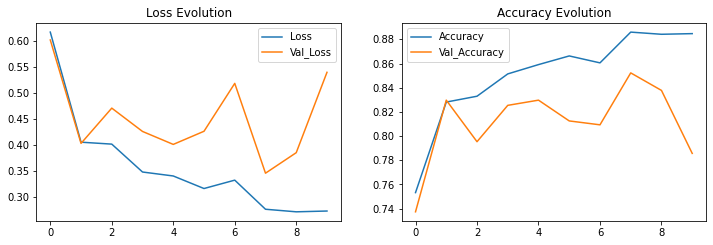

In [38]:
# TL Model
base_model = keras.applications.InceptionV3(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**DenseNet121**

Epoch 1/5
175/175 [==============================] - 75s 400ms/step - loss: 0.6918 - accuracy: 0.7100 - val_loss: 0.3991 - val_accuracy: 0.8238
Epoch 2/5
175/175 [==============================] - 68s 391ms/step - loss: 0.3446 - accuracy: 0.8499 - val_loss: 0.3070 - val_accuracy: 0.8727
Epoch 3/5
175/175 [==============================] - 68s 389ms/step - loss: 0.2901 - accuracy: 0.8798 - val_loss: 0.2883 - val_accuracy: 0.8802
Epoch 4/5
175/175 [==============================] - 68s 391ms/step - loss: 0.2512 - accuracy: 0.9011 - val_loss: 0.3021 - val_accuracy: 0.8765
Epoch 5/5
59/59 [==============================] - 6s 102ms/step - loss: 0.3348 - accuracy: 0.8629


Text(0.5, 1.0, 'Accuracy Evolution')

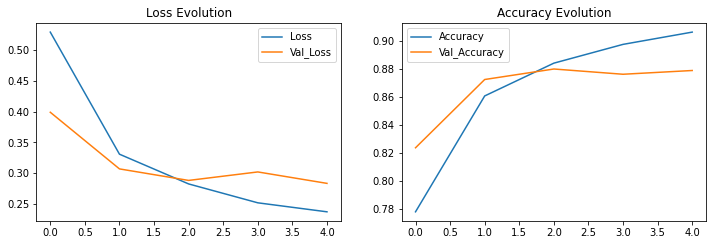

In [39]:
# TL Model
base_model = keras.applications.DenseNet121(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


Epoch 1/10
175/175 [==============================] - 76s 404ms/step - loss: 0.8114 - accuracy: 0.6745 - val_loss: 0.3968 - val_accuracy: 0.8335
Epoch 2/10
175/175 [==============================] - 68s 392ms/step - loss: 0.3821 - accuracy: 0.8426 - val_loss: 0.2949 - val_accuracy: 0.8765
Epoch 3/10
175/175 [==============================] - 68s 389ms/step - loss: 0.3062 - accuracy: 0.8719 - val_loss: 0.2610 - val_accuracy: 0.8894
Epoch 4/10
175/175 [==============================] - 68s 389ms/step - loss: 0.2529 - accuracy: 0.8978 - val_loss: 0.2521 - val_accuracy: 0.8953
Epoch 5/10
175/175 [==============================] - 68s 389ms/step - loss: 0.2513 - accuracy: 0.9008 - val_loss: 0.2581 - val_accuracy: 0.8878
Epoch 6/10
175/175 [==============================] - 68s 388ms/step - loss: 0.2169 - accuracy: 0.9153 - val_loss: 0.2207 - val_accuracy: 0.9055
Epoch 7/10
175/175 [==============================] - 68s 390ms/step - loss: 0.2092 - accuracy: 0.9112 - val_loss: 0.2140 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

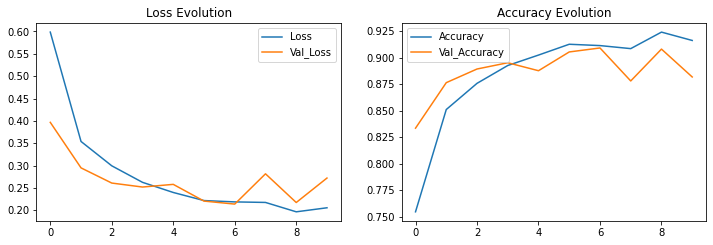

In [40]:
# TL Model
base_model = keras.applications.DenseNet121(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
